In [78]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [9]:
absp = '/data/shexuan/sjj/new_paper/filtered_data'
fastas = sorted([os.path.join(absp, f) for f in os.listdir('filtered_data') if f.endswith('.txt')])
fastas

['/data/shexuan/sjj/new_paper/filtered_data/Miscanthus_floridulus.txt',
 '/data/shexuan/sjj/new_paper/filtered_data/Miscanthus_giganteus.txt',
 '/data/shexuan/sjj/new_paper/filtered_data/Miscanthus_sacchariflorus.txt',
 '/data/shexuan/sjj/new_paper/filtered_data/Miscanthus_sinensis.txt',
 '/data/shexuan/sjj/new_paper/filtered_data/Miscanthus_transmorrisonensis.txt',
 '/data/shexuan/sjj/new_paper/filtered_data/Saccharum_spontaneum.txt',
 '/data/shexuan/sjj/new_paper/filtered_data/Sorghum_bicolor.txt']

In [19]:
outdir = '/data/shexuan/sjj/new_paper/COA/'
outfiles = sorted([os.path.join(outdir+f.split('.')[0], f.replace('txt','out')) 
                   for f in os.listdir('filtered_data') if f.endswith('.txt')])
outfiles

['/data/shexuan/sjj/new_paper/COA/Miscanthus_floridulus/Miscanthus_floridulus.out',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_giganteus/Miscanthus_giganteus.out',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_sacchariflorus/Miscanthus_sacchariflorus.out',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_sinensis/Miscanthus_sinensis.out',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_transmorrisonensis/Miscanthus_transmorrisonensis.out',
 '/data/shexuan/sjj/new_paper/COA/Saccharum_spontaneum/Saccharum_spontaneum.out',
 '/data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/Sorghum_bicolor.out']

In [81]:
outdir = '/data/shexuan/sjj/new_paper/COA/'
blkfiles = sorted([os.path.join(outdir+f.split('.')[0], f.replace('txt','blk')) 
                   for f in os.listdir('filtered_data') if f.endswith('.txt')])
blkfiles

['/data/shexuan/sjj/new_paper/COA/Miscanthus_floridulus/Miscanthus_floridulus.blk',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_giganteus/Miscanthus_giganteus.blk',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_sacchariflorus/Miscanthus_sacchariflorus.blk',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_sinensis/Miscanthus_sinensis.blk',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_transmorrisonensis/Miscanthus_transmorrisonensis.blk',
 '/data/shexuan/sjj/new_paper/COA/Saccharum_spontaneum/Saccharum_spontaneum.blk',
 '/data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/Sorghum_bicolor.blk']

In [84]:
coadir = '/data/shexuan/sjj/new_paper/COA/'
eigenfiles = sorted([os.path.join(coadir+f.split('.')[0], 'eigen.coa') 
                   for f in os.listdir('filtered_data') if f.endswith('.txt')])
eigenfiles

['/data/shexuan/sjj/new_paper/COA/Miscanthus_floridulus/eigen.coa',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_giganteus/eigen.coa',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_sacchariflorus/eigen.coa',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_sinensis/eigen.coa',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_transmorrisonensis/eigen.coa',
 '/data/shexuan/sjj/new_paper/COA/Saccharum_spontaneum/eigen.coa',
 '/data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/eigen.coa']

In [96]:
genefiles = sorted([os.path.join(coadir+f.split('.')[0], 'genes.coa') 
                       for f in os.listdir('filtered_data') if f.endswith('.txt')])
genefiles

['/data/shexuan/sjj/new_paper/COA/Miscanthus_floridulus/genes.coa',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_giganteus/genes.coa',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_sacchariflorus/genes.coa',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_sinensis/genes.coa',
 '/data/shexuan/sjj/new_paper/COA/Miscanthus_transmorrisonensis/genes.coa',
 '/data/shexuan/sjj/new_paper/COA/Saccharum_spontaneum/genes.coa',
 '/data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/genes.coa']

In [124]:
encdir = 'ENc'
gcfiles = sorted([os.path.join(encdir, f.replace('txt', 'out')) 
                       for f in os.listdir('filtered_data') if f.endswith('.txt')])
gcfiles

['ENc/Miscanthus_floridulus.out',
 'ENc/Miscanthus_giganteus.out',
 'ENc/Miscanthus_sacchariflorus.out',
 'ENc/Miscanthus_sinensis.out',
 'ENc/Miscanthus_transmorrisonensis.out',
 'ENc/Saccharum_spontaneum.out',
 'ENc/Sorghum_bicolor.out']

In [86]:
titles = ['Miscanthus floridulus', 'Miscanthus x giganteus', 'Miscanthus sacchariflorus', 
          'Miscanthus sinensis', 'Miscanthus transmorrisonensis', 'Saccharum spontaneum',
          'Sorghum bicolor']

In [94]:
def eigens_stat(eigen_coa, species='aaa'):
    """计算各个维度的贡献.
    """
    eigen = pd.read_csv(eigen_coa, delimiter=r'\s+',header=None, 
                        names=['axis', 'eigen', species, 'cumsum'])\
            .set_index('axis').iloc[:4,:]

    eigen = eigen[[species]].T.reset_index()
    eigen.columns = ['Species', 'Axis1', 'Axis2', 'Axis3', 'Axis4']
    
    return eigen


df_eigens = pd.DataFrame()

for idx, (eigf, title) in enumerate(zip(eigenfiles, titles)):
    print(eigf)
    df = eigens_stat(eigf, title)
    df_eigens = df_eigens.append(df)

df_eigens['sum'] = df_eigens['Axis1'] + df_eigens['Axis2'] + \
                        df_eigens['Axis3'] + df_eigens['Axis4']

df_eigens.to_excel('Step7_Coa_axis_contribution.xlsx', 
                   header=True, index=False, encoding='utf-8')
df_eigens

/data/shexuan/sjj/new_paper/COA/Miscanthus_floridulus/eigen.coa
/data/shexuan/sjj/new_paper/COA/Miscanthus_giganteus/eigen.coa
/data/shexuan/sjj/new_paper/COA/Miscanthus_sacchariflorus/eigen.coa
/data/shexuan/sjj/new_paper/COA/Miscanthus_sinensis/eigen.coa
/data/shexuan/sjj/new_paper/COA/Miscanthus_transmorrisonensis/eigen.coa
/data/shexuan/sjj/new_paper/COA/Saccharum_spontaneum/eigen.coa
/data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/eigen.coa


,Species,Axis1,Axis2,Axis3,Axis4,sum
0,Miscanthus floridulus,0.1433,0.0858,0.0721,0.0610,0.3622
0,Miscanthus x giganteus,0.1591,0.0817,0.0734,0.0676,0.3818
0,Miscanthus sacchariflorus,0.1584,0.0830,0.0745,0.0688,0.3847
0,Miscanthus sinensis,0.1578,0.0825,0.0742,0.0686,0.3831
0,Miscanthus transmorrisonensis,0.1459,0.0867,0.0730,0.0624,0.3680
0,Saccharum spontaneum,0.1595,0.0931,0.0875,0.0671,0.4072
0,Sorghum bicolor,0.1717,0.1080,0.0700,0.0597,0.4094


In [155]:
def plot_genes_coa(gene_coa_file, gc_file=None):
    """绘制轴1轴2之间的关系
    """
    df_gc = pd.read_csv(gc_file, header=0, sep='\t')
    genes_coa = pd.read_csv(gene_coa_file, header=0,
                            delimiter=r'\s+')
    df = pd.concat([df_gc, genes_coa], axis=1)
    df.loc[df.GC<0.45, 'GC_content'] = 'GC<0.45'
    df.loc[(df.GC>=0.45) & (df.GC<=0.6), 'GC_content'] = '0.45<=GC<=0.6'
    
    return df


def calc_corr(df, col1, col2):
    """计算两列的相关性
    """
    print('\nPearson:')
    pears_res = stats.pearsonr(df[col1], df[col2])
    print(pears_res)
    print('\nSpearson:')
    spears_res = stats.spearmanr(df[col1], df[col2])
    print(spears_res)
    print('\nKendalltau:')
    kenda_res = stats.kendalltau(df[col1], df[col2])
    print(kenda_res)
    return kenda_res


********** 1 /data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/genes.coa Miscanthus floridulus **********
********** 2 /data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/genes.coa Miscanthus x giganteus **********
********** 3 /data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/genes.coa Miscanthus sacchariflorus **********
********** 4 /data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/genes.coa Miscanthus sinensis **********
********** 5 /data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/genes.coa Miscanthus transmorrisonensis **********
********** 6 /data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/genes.coa Saccharum spontaneum **********
********** 7 /data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/genes.coa Sorghum bicolor **********


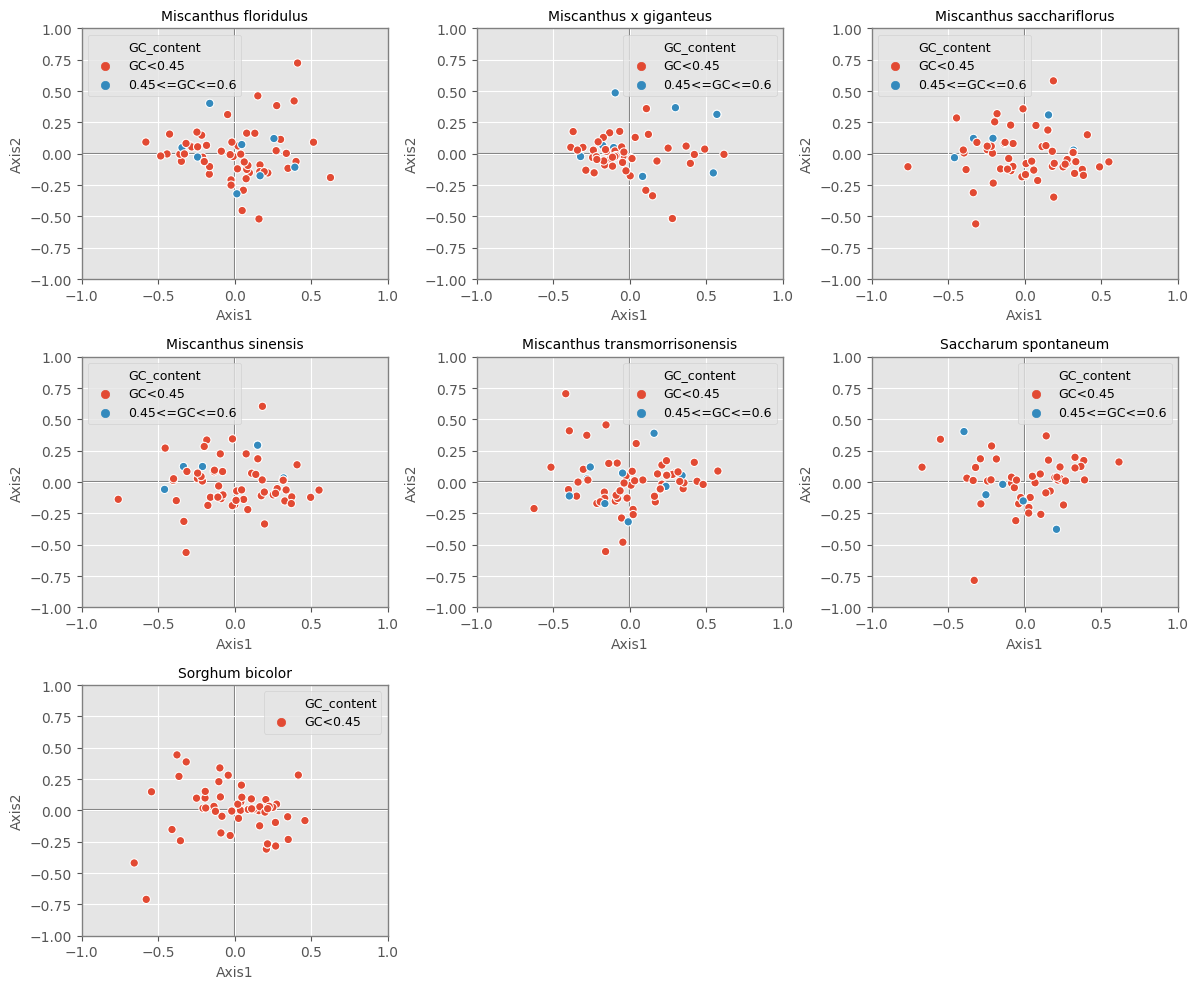

In [148]:
import seaborn as sns
from scipy import stats
plt.figure(figsize=(12, 10), dpi=100)


for i, (fg, gcf, title) in enumerate(zip(genefiles, gcfiles, titles), 1):
    print('*'*10, i, f, title, '*'*10)
    plt.subplot(3, 3, i)
    df_gene_coa = plot_genes_coa(fg, gc_file=gcf)
    # calc_corr(df_gene_coa, 'CAI', 'Axis1')
    # sns.lmplot('Axis1', 'Axis2', data=df_gene_coa, hue='GC_content', fit_reg=False)
    sns.scatterplot('Axis1', 'Axis2', data=df_gene_coa, hue='GC_content')
    plt.legend(fontsize=9)
    plt.xlabel('Axis1', fontsize=10)
    plt.ylabel('Axis2', fontsize=10)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    #plt.vlines(0, 0, 1, color="red")#竖线
    plt.axvline(0, color='gray', zorder=0)
    plt.axhline(0, color='gray', zorder=0)
    plt.title(title, fontsize=10)

    ax = plt.gca()#获取边框
    ax.spines['top'].set_color('gray')  # 设置上‘脊梁’为红色
    ax.spines['right'].set_color('gray')  # 设置上‘脊梁’为无色
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')

plt.tight_layout()

plt.savefig('Step7_genes_coa_axis.png')

In [ ]:
species   col, col_pvalue

In [171]:
corr_cols = ['T3s', 'C3s', 'A3s', 'G3s', 'CAI', 'CBI', 'Fop', 'Nc', 'GC3s', 'GC', 'L_sym', 'L_aa']
corr_results = []

for i, (fg, gcf, title) in enumerate(zip(genefiles, gcfiles, titles), 1):
    print('*'*10, i, f, title, '*'*10)
    df_gene_coa = plot_genes_coa(fg, gc_file=gcf)
    tmp_corr_res = []
    for col in corr_cols:
        corr_res = calc_corr(df_gene_coa, col, 'Axis1')
        if corr_res.pvalue<=0.05:
            p_value = '*'
        else:
            p_value = ''
        if corr_res.pvalue<=0.01:
            p_value = '**'
        
        tmp_corr_res.append(str(round(corr_res.correlation,3))+p_value)
    corr_results.append(tmp_corr_res)

********** 1 /data/shexuan/sjj/new_paper/COA/Sorghum_bicolor/genes.coa Miscanthus floridulus **********

Pearson:
(-0.8257725610985311, 2.5784760403232297e-17)

Spearson:
SpearmanrResult(correlation=-0.8385729115946196, pvalue=2.861755684621153e-18)

Kendalltau:
KendalltauResult(correlation=-0.6503008611925918, pvalue=2.023216551789846e-14)

Pearson:
(0.7006469630270517, 8.175206344499736e-11)

Spearson:
SpearmanrResult(correlation=0.7039230700301774, pvalue=6.11472597621787e-11)

Kendalltau:
KendalltauResult(correlation=0.5073479951310585, pvalue=2.4861810093075154e-09)

Pearson:
(-0.21367616929099023, 0.08743497130307516)

Spearson:
SpearmanrResult(correlation=-0.1903970977572945, pvalue=0.12871712749099204)

Kendalltau:
KendalltauResult(correlation=-0.13288398266220772, pvalue=0.11812494476459272)

Pearson:
(0.8002238621118363, 1.2693070545937414e-15)

Spearson:
SpearmanrResult(correlation=0.7887887232072296, pvalue=6.07875946678761e-15)

Kendalltau:
KendalltauResult(correlation=0.5

In [177]:
df_corr = pd.DataFrame(corr_results, columns=corr_cols)
df_corr.index = titles
df_corr = df_corr.reset_index()
df_corr.columns = ['Species'] + corr_cols
df_corr

,Species,T3s,C3s,A3s,G3s,CAI,CBI,Fop,Nc,GC3s,GC,L_sym,L_aa
0,Miscanthus floridulus,-0.65**,0.507**,-0.133,0.598**,-0.152,0.073,0.098,0.28**,0.639**,0.159,-0.317**,-0.315**
1,Miscanthus x giganteus,0.016,0.053,-0.104,-0.127,-0.038,0.044,0.078,0.09,-0.018,0.223**,0.055,0.057
2,Miscanthus sacchariflorus,0.66**,-0.463**,0.171*,-0.708**,0.176*,0.044,0.086,-0.43**,-0.7**,-0.154,0.124,0.118
3,Miscanthus sinensis,0.663**,-0.469**,0.18*,-0.711**,0.17*,0.043,0.083,-0.423**,-0.708**,-0.154,0.128,0.123
4,Miscanthus transmorrisonensis,0.647**,-0.509**,0.129,-0.604**,0.147,-0.076,-0.099,-0.285**,-0.641**,-0.152,0.322**,0.318**
5,Saccharum spontaneum,0.693**,-0.479**,0.201*,-0.691**,0.193,0.02,-0.012,-0.217*,-0.667**,-0.19,0.206*,0.197*
6,Sorghum bicolor,0.412**,-0.464**,0.25**,-0.726**,0.33**,0.253**,0.252**,-0.48**,-0.685**,-0.035,0.034,0.034


In [178]:
df_corr.to_excel('Step7_correlation_stats.xlsx', index=False, header=True, encoding='utf-8')